# Gas_turbine

In [1]:
#load libraries
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
gas = pd.read_csv("D:/ExcelR/Assignments/Downloaded/Neural networks/gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


-No null values from data

#### correlation matrix

In [4]:
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [5]:
#Count of duplicated rows
gas[gas.duplicated()].shape

(0, 11)

In [6]:
gas['TAT'].value_counts()

550.01    270
550.00    268
550.04    266
550.03    253
549.98    252
         ... 
536.25      1
539.04      1
534.51      1
529.28      1
525.37      1
Name: TAT, Length: 2340, dtype: int64

In [7]:
#calculating VIF for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [8]:
X = gas.drop('TEY',axis=1)
calc_vif(X)

,variables,VIF
0,AT,3.414439e+01
1,AP,1.842147e+04
2,AH,6.863745e+01
3,AFDP,8.580114e+01
4,GTEP,1.233878e+04
5,TIT,1.372092e+06
6,TAT,8.166382e+05
7,CDP,3.858125e+04
8,CO,3.813210e+00
9,NOX,1.071006e+02


###### Normalization 

In [9]:
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [10]:
#Spliting The Data
predictors = gas.drop('TEY',axis=1)
target = gas['TEY']

In [11]:
len(predictors)

15039

In [12]:
len(target)

15039

In [13]:
predictors.shape #shape of train data

(15039, 10)

In [14]:
target.shape  #shape of test data

(15039,)

In [15]:
#adding normalization to train data.
predictors1 = norm_func(predictors)
predictors1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [16]:
#using train_test_split splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3)

## building a model

In [17]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(10,)),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(np.array(x_train),np.array(y_train),
          batch_size=12, epochs=100,
          validation_data=(x_test, y_test))

Epoch 1/100
878/878 [==============================] - 10s 1ms/step - loss: -2009.2361 - accuracy: 0.0000e+00 - val_loss: -2031.2948 - val_accuracy: 0.0000e+00
Epoch 2/100
878/878 [==============================] - 1s 612us/step - loss: -2032.9597 - accuracy: 0.0000e+00 - val_loss: -2031.2948 - val_accuracy: 0.0000e+00
Epoch 3/100
878/878 [==============================] - 1s 673us/step - loss: -2029.5856 - accuracy: 0.0000e+00 - val_loss: -2031.2948 - val_accuracy: 0.0000e+00
Epoch 4/100
878/878 [==============================] - 1s 652us/step - loss: -2028.9347 - accuracy: 0.0000e+00 - val_loss: -2031.2948 - val_accuracy: 0.0000e+00
Epoch 5/100
878/878 [==============================] - 1s 654us/step - loss: -2031.9228 - accuracy: 0.0000e+00 - val_loss: -2031.2948 - val_accuracy: 0.0000e+00
Epoch 6/100
878/878 [==============================] - 1s 669us/step - loss: -2030.1242 - accuracy: 0.0000e+00 - val_loss: -2031.2948 - val_accuracy: 0.0000e+00
Epoch 7/100
878/878 [==============

In [20]:
model.evaluate(x_test, y_test)[1]

141/141 [==============================] - 0s 591us/step - loss: -2031.2946 - accuracy: 0.0000e+00


0.0

As we are getting 0.0 accuracy we will build a diff model using different loss function and different optimizer.

## building another new model

In [21]:
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(10,)),
    Dense(12, activation='relu'),
    Dense(1, activation='linear'),
])

In [22]:
model1.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])

In [23]:
hist_1 = model1.fit(np.array(x_train),np.array(y_train),
          batch_size=12, epochs=100,
          validation_data=(x_test, y_test))

Epoch 1/100
878/878 [==============================] - 1s 815us/step - loss: 11736.0220 - mse: 11736.0220 - val_loss: 90.3979 - val_mse: 90.3979
Epoch 2/100
878/878 [==============================] - 1s 633us/step - loss: 81.5486 - mse: 81.5486 - val_loss: 51.9001 - val_mse: 51.9001
Epoch 3/100
878/878 [==============================] - 1s 639us/step - loss: 46.4619 - mse: 46.4619 - val_loss: 32.0359 - val_mse: 32.0359
Epoch 4/100
878/878 [==============================] - 1s 631us/step - loss: 30.6926 - mse: 30.6926 - val_loss: 26.5509 - val_mse: 26.5509
Epoch 5/100
878/878 [==============================] - 1s 623us/step - loss: 26.6792 - mse: 26.6792 - val_loss: 24.0897 - val_mse: 24.0897
Epoch 6/100
878/878 [==============================] - 1s 595us/step - loss: 23.4418 - mse: 23.4418 - val_loss: 21.0398 - val_mse: 21.0398
Epoch 7/100
878/878 [==============================] - 1s 621us/step - loss: 20.7336 - mse: 20.7336 - val_loss: 18.1170 - val_mse: 18.1170
Epoch 8/100
878/878 [

In [24]:
# evaluate the model
scores = model1.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

141/141 [==============================] - 0s 634us/step - loss: 0.8609 - mse: 0.8609
mse: 86.09%


Here we got some better results 
Therefore we choose a model with loss funtion = "mean_squared_error",optimizer = "adam" .


In [25]:
#Visualize the train data
# list all data in history
model1.history.history.keys()

dict_keys([])

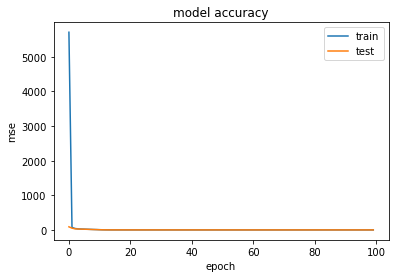

In [26]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(hist_1.history['mse'])
plt.plot(hist_1.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

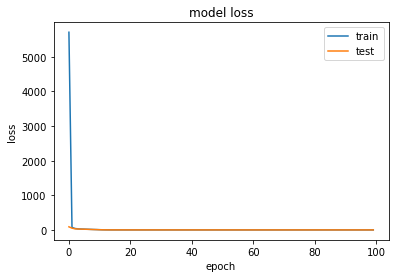

In [27]:
# summarize history for loss
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()